In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pickle
import qutip as qt


import importlib


import src.src_current_measurement_simulations
import src.src_current_measurement_simulations_reduced

importlib.reload(src.src_current_measurement_simulations)
importlib.reload(src.src_current_measurement_simulations_reduced)

from src.src_current_measurement_simulations import CurrentMeasurementSimulation, create_annihilation_operators
from src.src_current_measurement_simulations_reduced import CurrentMeasurementSimulationReduced

# 1. Current Correlations

In [3]:
### 8 qubits

num_levels = 3
num_qubits = 8
num_particles = 4

# pi flux
J = -np.array([6.02, 6.26, 6.01, 6.23, 6.07, 6.36, 6.13]) * 2 * np.pi # MHz
J_parallel = -np.array([7.08, 7.33, 7.30, 7.70, 7.26, 7.01]) * 2 * np.pi # MHz

J = -np.array([6]*8) * 2 * np.pi
J_parallel = 2 * J

J = J[:num_qubits-1]
J_parallel = J_parallel[:num_qubits-2]

initial_detunings = np.array([0, 0, 0, 0, 0, 0, 0, 0]) * 2 * np.pi # MHz
initial_detunings = initial_detunings[:num_qubits]
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()

measurement_detuning = np.array([-200, -200, 500, 500, -100, -100, 300, 300]) * 2 * np.pi  # MHz
# measurement_detuning = np.array([-200, -200, 200, 600, 600, -100, -100, 500]) * 2 * np.pi  # MHz
measurement_detuning = measurement_detuning[:num_qubits]


U = -180 * 2 * np.pi

T1 = 40  # 40 microseconds
T2 = 5  # 5 microseconds

T1 = None
T2 = None


times = np.linspace(0, 0.12, 101)  # microseconds
time_offset = 0

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]
# readout_pair_2 = [4, 3]
# readout_pair_2 = [4, 5]
# readout_pair_2 = [6, 5]
# readout_pair_2 = [6, 7]


psi0 = -1

# psi0 = ramp_state_2us

# psi0 = eigenstate



In [ ]:
ramp_state_5us_array = T2_to_states[5][10].full()
ramp_state_10us_array = T2_to_states[10][10].full()

ramp_state = ramp_state_5us_array

basis = list(product(range(num_levels), repeat=num_qubits))

basis_4 = [basis_state for basis_state in basis if sum(basis_state) == 4]

basis_to_matrix_element = {}

for i in range(len(basis_4)):
    for j in range(len(basis_4)):
        basis_to_matrix_element[(basis_4[i], basis_4[j])] = ramp_state[i, j]


basis = list(product(range(num_levels), repeat=num_qubits))
mixed_state = np.zeros((len(basis), len(basis)), dtype=complex)
for i in range(len(basis)):
    basis_state_1 = basis[i]
    for j in range(len(basis)):
        basis_state_2 = basis[j]
        if (basis_state_1, basis_state_2) in basis_to_matrix_element:
            probability = basis_to_matrix_element.get((basis_state_1, basis_state_2), 0)
            mixed_state[i, j] = probability

mixed_state = qt.Qobj(mixed_state, dims=[[num_levels]*num_qubits, [num_levels]*num_qubits])
psi0 = mixed_state



In [ ]:
# probabilities = [0.003257328990228013, 0.006514657980456026, 0.006514657980456026, 0.009771986970684038, 0.003257328990228013, 0.0, 0.013029315960912053, 0.009771986970684038, 0.016286644951140065, 0.0, 0.003257328990228013, 0.026058631921824105, 0.019543973941368076, 0.03257328990228013, 0.006514657980456026, 0.009771986970684038, 0.016286644951140065, 0.016286644951140065, 0.013029315960912053, 0.016286644951140065, 0.003257328990228013, 0.003257328990228013, 0.006514657980456026, 0.013029315960912053, 0.009771986970684038, 0.035830618892508145, 0.016286644951140065, 0.009771986970684038, 0.016286644951140065, 0.019543973941368076, 0.006514657980456026, 0.016286644951140065, 0.009771986970684038, 0.009771986970684038, 0.006514657980456026, 0.013029315960912053, 0.013029315960912053, 0.019543973941368076, 0.009771986970684038, 0.02280130293159609, 0.02280130293159609, 0.013029315960912053, 0.03257328990228013, 0.019543973941368076, 0.016286644951140065, 0.009771986970684038, 0.009771986970684038, 0.016286644951140065, 0.029315960912052116, 0.009771986970684038, 0.013029315960912053, 0.02280130293159609, 0.019543973941368076, 0.006514657980456026, 0.019543973941368076, 0.029315960912052116, 0.013029315960912053, 0.019543973941368076, 0.02280130293159609, 0.035830618892508145, 0.019543973941368076, 0.009771986970684038, 0.013029315960912053, 0.003257328990228013, 0.019543973941368076, 0.016286644951140065, 0.016286644951140065, 0.009771986970684038, 0.019543973941368076, 0.003257328990228013]

# bitstrings = list(product([0,1], repeat=num_qubits))
# bitstrings_post_selected = [bitstring for bitstring in bitstrings if sum(bitstring) == num_particles]

# basis = list(product(range(num_levels), repeat=num_qubits))



# initial_populations = np.zeros(8)
# for i in range(len(bitstrings_post_selected)):
#     # print(f'bitstrings: {bitstrings_post_selected[i]}')
#     # print(np.where(qt.basis([num_levels]*num_qubits, list(bitstrings_post_selected[i])).full() == 1)[0][0])
#     # print(basis.index(bitstrings_post_selected[i]))
#     for j in range(len(bitstrings_post_selected[i])):
#         if bitstrings_post_selected[i][j] == 1:
#             initial_populations[j] += probabilities[i]
# print(f'initial populations: {initial_populations}')
# print(sum(initial_populations))

# bitstrings_to_probability = {bitstrings_post_selected[i]: probabilities[i] for i in range(len(bitstrings_post_selected))}



# mixed_state = np.zeros((len(basis), len(basis)), dtype=complex)
# for i in range(len(basis)):
#     basis_state = basis[i]
#     if basis_state in bitstrings_to_probability:
#         probability = bitstrings_to_probability.get(basis_state, 0)
#         mixed_state[i, i] = probability

# mixed_state = qt.Qobj(mixed_state, dims=[[num_levels]*num_qubits, [num_levels]*num_qubits])

# psi0 = mixed_state

# reduced_density_matrix = mixed_state.ptrace(0)
# print(mixed_state.dims)
# print(reduced_density_matrix)
# print(reduced_density_matrix.tr())

# print(mixed_state.full()[np.where(mixed_state.full() != 0)])

In [ ]:
current_simulation = CurrentMeasurementSimulationReduced(
    num_levels=num_levels,
    num_qubits=num_qubits,
    num_particles=num_particles,
    J=J,
    J_parallel=J_parallel,
    U=U,
    times=times,
    readout_pair_1=readout_pair_1,
    readout_pair_2=readout_pair_2,
    initial_detunings=initial_detunings,
    measurement_detuning=measurement_detuning,
    measurement_J=measurement_J,
    measurement_J_parallel=measurement_J_parallel,
    psi0=psi0,
    time_offset=time_offset,
    T1=T1,
    T2=T2,
    print_logs=True
)

# current_simulation.run_simulation()

In [ ]:
# # 3 levels, 8 qubits, 4 particles
# particle_number_to_eigenenergy_stored = current_simulation.particle_number_to_eigenenergy
# particle_number_to_eigenstate_stored = current_simulation.particle_number_to_eigenstate

In [ ]:
psi0 = current_simulation.psi0

In [ ]:
current_simulation.run_simulation(False)


In [ ]:
current_simulation.plot_populations()
current_simulation.plot_population_difference()

In [ ]:
current_simulation.plot_covariance()
current_simulation.plot_covariance_sum()

# covariance_sum = current_simulation.get_covariance_sum()

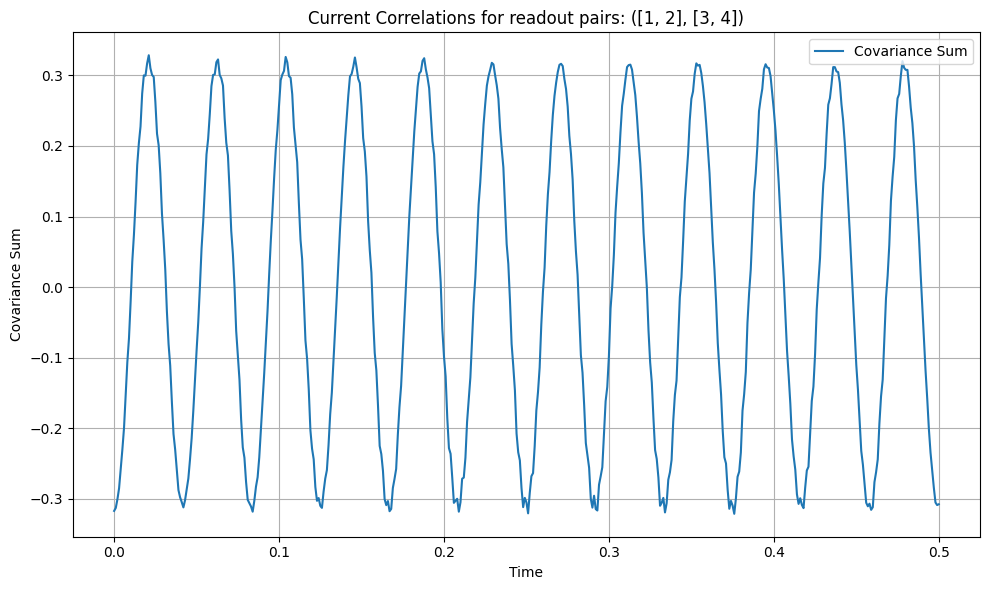

In [ ]:
# plot correlation custom

current_correlation_simulation = current_simulation.get_covariance_sum()
plt.plot(times*1e3, current_correlation_simulation, label='Simulated Correlation')
plt.xlabel('Time (ns)')
plt.ylabel('Current Correlation')
plt.title('Current Correlation Simulation 12-76')
plt.ylim(-0.15, 0.15)
plt.ylim(-0.4, 0.4)

beamsplitter_time = 20.4
plt.axvline(beamsplitter_time, color='r', alpha=0.4, linestyle='--', label='Beamsplitter Time')

print(current_correlation_simulation[np.argmin(np.abs(times*1e3 - beamsplitter_time))])

print(np.max(current_correlation_simulation))

# plt.legend()
plt.show()

In [ ]:
beamsplitter_index = np.argmin(np.abs(times*1e3 - beamsplitter_time))
print("Beamsplitter Index:", beamsplitter_index)
print("Current Correlation Simulation:", current_correlation_simulation[beamsplitter_index])

# 1.2 Sweep Rungs

In [2]:
### 8 qubits

num_levels = 2
num_qubits = 8
num_particles = 4

# pi flux
J = -np.array([6.02, 6.26, 6.01, 6.23, 6.07, 6.36, 6.13]) * 2 * np.pi # MHz
J_parallel = -np.array([7.08, 7.33, 7.30, 7.70, 7.26, 7.01]) * 2 * np.pi # MHz

J = -np.array([6]*8) * 2 * np.pi
J_parallel = 2 * J

J = J[:num_qubits-1]
J_parallel = J_parallel[:num_qubits-2]

initial_detunings = np.array([0, 0, 0, 0, 0, 0, 0, 0]) * 2 * np.pi # MHz
initial_detunings = initial_detunings[:num_qubits]
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()


U = -180 * 2 * np.pi

T1 = 40  # 40 microseconds
T2 = 5  # 5 microseconds

T1 = None
T2 = None


times = np.linspace(0, 0.12, 201)  # microseconds
time_offset = 0


psi0 = -1

# psi0 = ramp_state_2us


In [3]:
# initialize to get psi0

current_simulation = CurrentMeasurementSimulation(
        num_levels=num_levels,
        num_qubits=num_qubits,
        num_particles=num_particles,
        J=J,
        J_parallel=J_parallel,
        U=U,
        times=times,
        readout_pair_1=[0,1],
        readout_pair_2=[2,3],
        psi0=psi0,
        print_logs=True
)

psi0 = current_simulation.psi0

: 

In [6]:
correlation_pairs = []

for a in range(1, 8):  # a from 1 to 7
    b = a + 1
    for c in range(a + 2, 8):  # ensure a < b < c < d
        d = c + 1
        correlation_pairs.append(((a, b), (c, d)))

# for x in correlation_pairs:
    # print(x)


correlation_pair_to_measurement_detunings = {}

# 12-xy
detuning_1234 = np.array([-200, -200, 500, 500, -100, -100, 300, 300]) * 2 * np.pi # MHz
detuning_1245 = np.array([500, 500, -300, 100, 100, -300, -300, -300]) * 2 * np.pi
detuning_1256 = detuning_1234
detuning_1267 = np.array([-200, -200, 500, 500, 500, -100, -100, 500]) * 2 * np.pi
detuning_1278 = detuning_1234

# 23-xy
detuning_2345 = np.array([300, -200, -200, 500, 500, -100, -100, 300]) * 2 * np.pi # MHz
detuning_2356 = np.array([-300, 100, 100, -300, 500, 500, -300, -300]) * 2 * np.pi
detuning_2367 = detuning_2345
detuning_2378 = np.array([500, -200, -200, 500, 500, 500, -100, -100]) * 2 * np.pi

# 34-xy
detuning_3456 = detuning_1234
detuning_3467 = np.array([-300, -300, 100, 100, -300, 500, 500, -300]) * 2 * np.pi
detuning_3478 = detuning_1234

# 45-xy
detuning_4567 = detuning_2345
detuning_4578 = np.array([-300, -300, -300, 100, 100, -300, 500, 500]) * 2 * np.pi

# 56-78
detuning_5678 = detuning_1234



correlation_pair_to_measurement_detunings[((1, 2), (3, 4))] = detuning_1234
correlation_pair_to_measurement_detunings[((1, 2), (4, 5))] = detuning_1245
correlation_pair_to_measurement_detunings[((1, 2), (5, 6))] = detuning_1256
correlation_pair_to_measurement_detunings[((1, 2), (6, 7))] = detuning_1267
correlation_pair_to_measurement_detunings[((1, 2), (7, 8))] = detuning_1278

correlation_pair_to_measurement_detunings[((2, 3), (4, 5))] = detuning_2345
correlation_pair_to_measurement_detunings[((2, 3), (5, 6))] = detuning_2356
correlation_pair_to_measurement_detunings[((2, 3), (6, 7))] = detuning_2367
correlation_pair_to_measurement_detunings[((2, 3), (7, 8))] = detuning_2378

correlation_pair_to_measurement_detunings[((3, 4), (5, 6))] = detuning_3456
correlation_pair_to_measurement_detunings[((3, 4), (6, 7))] = detuning_3467
correlation_pair_to_measurement_detunings[((3, 4), (7, 8))] = detuning_3478

correlation_pair_to_measurement_detunings[((4, 5), (6, 7))] = detuning_4567
correlation_pair_to_measurement_detunings[((4, 5), (7, 8))] = detuning_4578

correlation_pair_to_measurement_detunings[((5, 6), (7, 8))] = detuning_5678


In [30]:
correlation_pairs = []

# for i in range(5):
    # correlation_pairs.append(((i+1, i+2),(i+3, i+4)))

correlation_pairs.append(((5,6),(7,8)))

In [5]:
importlib.reload(src.src_current_measurement_simulations)
importlib.reload(src.src_current_measurement_simulations_reduced)

from src.src_current_measurement_simulations import CurrentMeasurementSimulation, create_annihilation_operators
from src.src_current_measurement_simulations_reduced import CurrentMeasurementSimulationReduced

correlation pair: ((5, 6), (7, 8))
[4, 5]
[6, 7]
processing psi0, given type: <class 'qutip.core.qobj.Qobj'>
reduced indices: [4, 5, 6, 7]
Quantum object: dims=[[3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3]], shape=(6561, 6561), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.83966221e-51 3.07444299e-43 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.07444299e-43 9.60622374e-36 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


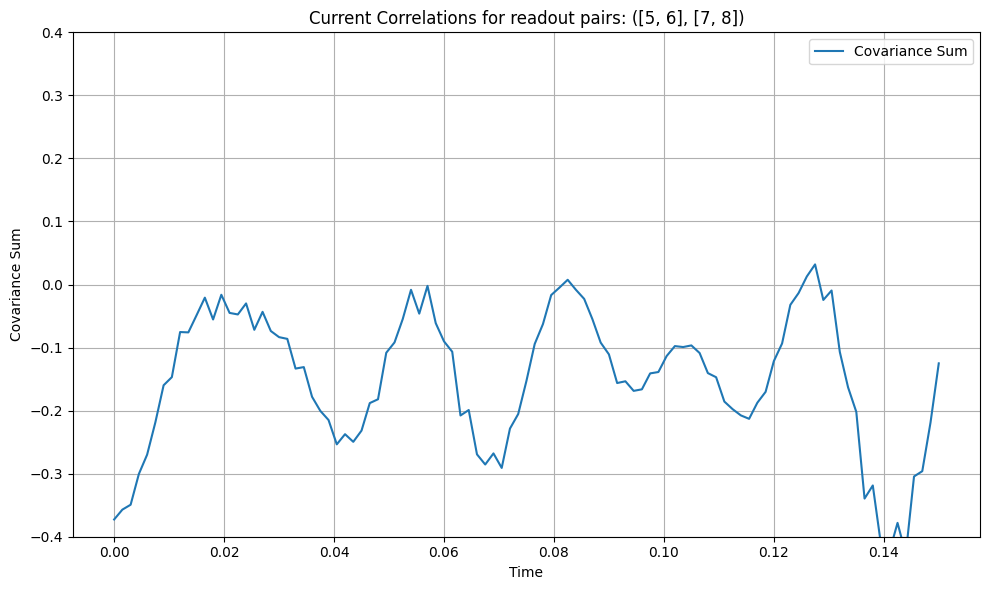

[-1256.63706144 -1256.63706144  3141.59265359  3141.59265359
  -628.31853072  -628.31853072  1884.95559215  1884.95559215]
Quantum object: dims=[[3, 3, 3, 3], [3, 3, 3, 3]], shape=(81, 81), type='oper', dtype=Dia, isherm=True
Qobj data =
[[    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.          1884.95559215     0.         ...     0.
      0.             0.        ]
 [    0.             0.          1256.63706144 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... -6283.18530718
      0.             0.        ]
 [    0.             0.             0.         ...     0.
  -4398.22971503     0.        ]
 [    0.             0.             0.         ...     0.
      0.         -5026.54824574]]
Quantum object: dims=[[3, 3, 3, 3], [3, 3, 3, 3]], shape=(81, 81), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.80221793e-03  2.75555791e-16 -5.57737500e-19 ... -5.60520697e-41
   1.86916469e-

In [48]:
covariance_sums = np.zeros((len(correlation_pairs), len(times)))

for i in range(len(correlation_pairs)):

    correlation_pair = correlation_pairs[i]
    print(f'correlation pair: {correlation_pair}')

    readout_qubits_1, readout_qubits_2 = correlation_pair

    readout_pair_1 = list(np.array(readout_qubits_1) - 1)
    readout_pair_2 = list(np.array(readout_qubits_2) - 1)

    print(readout_pair_1)
    print(readout_pair_2)

    measurement_detuning = correlation_pair_to_measurement_detunings[correlation_pair]

    current_simulation = CurrentMeasurementSimulationReduced(
        num_levels=num_levels,
        num_qubits=num_qubits,
        num_particles=num_particles,
        J=J,
        J_parallel=J_parallel,
        U=U,
        times=times,
        readout_pair_1=readout_pair_1,
        readout_pair_2=readout_pair_2,
        initial_detunings=initial_detunings,
        measurement_detuning=measurement_detuning,
        psi0=psi0,
        T1=T1,
        T2=T2,
        print_logs=False
    )

    current_simulation.run_simulation(False)

    current_simulation.plot_covariance_sum(ylim=(-0.4, 0.4))
    covariance_sums[i, :] = current_simulation.get_covariance_sum()

    print(current_simulation.measurement_detuning)
    print(current_simulation.measurement_Hamiltonian)
    print(current_simulation.psi0)

    test_H = current_simulation.measurement_Hamiltonian
    test_rho = current_simulation.psi0



# 2. Sweep Ramp Time
Use state from Josh's ramp simulations with dephasing as initial state for simulating beamsplitter measurement.

In [ ]:
ramp_times_filename = r"C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\current_measurements\ramp_with_dephasing_simulation_files\Tlist.pkl"

with open(ramp_times_filename, "rb") as f:
    ramp_times = pickle.load(f)

T2_to_filename = {}
T2s = [2, 5, 10, 40]
for T2 in T2s:
    T2_to_filename[T2] = r"C:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\current_measurements\ramp_with_dephasing_simulation_files\hemistates_{}us.pkl".format(T2)



T2_to_states = {}

for T2 in T2s:
    with open(T2_to_filename[T2], "rb") as f:
        T2_to_states[T2] = pickle.load(f)


target_ramp_time = 860
ramp_time_index = np.argmin(np.abs(ramp_times - target_ramp_time))

print(ramp_time_index)

In [ ]:
print(T2_to_states[5][0])

In [ ]:
### 8 qubits

num_levels = 3
num_qubits = 8
num_particles = 4

# pi flux
J = -np.array([6.02, 6.26, 6.01, 6.23, 6.07, 6.36, 6.13]) * 2 * np.pi # MHz
J_parallel = -np.array([7.08, 7.33, 7.30, 7.70, 7.26, 7.01]) * 2 * np.pi # MHz

J = J[:num_qubits-1]
J_parallel = J_parallel[:num_qubits-2]

initial_detunings = np.array([0, 0, 0, 0, 0, 0, 0, 0]) * 2 * np.pi # MHz
initial_detunings = initial_detunings[:num_qubits]
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()

measurement_detuning = np.array([-200, -200, 500, 500, -100, -100, 300, 300]) * 2 * np.pi  # MHz
# measurement_detuning = np.array([300, 300, -300, -302]) * 2 * np.pi  # MHz
measurement_detuning = measurement_detuning[:num_qubits]


U = -180 * 2 * np.pi

T1 = 40  # 40 microseconds
T2 = 5  # 5 microseconds

# T1 = None
# T2 = None


times = np.linspace(0, 0.2, 101)  # microseconds
time_offset = 0

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]




In [ ]:
# T2_to_data = {}
# for T2 in T2s:
#     T2_to_data[T2] = np.zeros((len(ramp_times), len(times)))

In [ ]:
def construct_initial_state(ramp_state, basis, basis_m):

    if isinstance(ramp_state, qt.Qobj):
        ramp_state = ramp_state.full()


    basis_to_matrix_element = {}

    

    for i in range(len(basis_m)):
        for j in range(len(basis_m)):
            basis_to_matrix_element[(basis_m[i], basis_m[j])] = ramp_state[i, j]


    basis = list(product(range(num_levels), repeat=num_qubits))
    mixed_state = np.zeros((len(basis), len(basis)), dtype=complex)
    for i in range(len(basis)):
        basis_state_1 = basis[i]
        for j in range(len(basis)):
            basis_state_2 = basis[j]
            if (basis_state_1, basis_state_2) in basis_to_matrix_element:
                probability = basis_to_matrix_element.get((basis_state_1, basis_state_2), 0)
                mixed_state[i, j] = probability

    mixed_state = qt.Qobj(mixed_state, dims=[[num_levels]*num_qubits, [num_levels]*num_qubits])
    return mixed_state



In [ ]:
analyze_T2s = [5]
analyze_T2s = T2_to_data.keys()


basis = list(product(range(num_levels), repeat=num_qubits))
basis_4 = [basis_state for basis_state in basis if sum(basis_state) == 4]


for T2 in analyze_T2s:

    print(f'T2: {T2} us')

    for i in range(len(ramp_times)):

        print(f'\t{i}')

        psi0 = construct_initial_state(T2_to_states[T2][i], basis, basis_4)

        current_simulation = CurrentMeasurementSimulationReduced(
            num_levels=num_levels,
            num_qubits=num_qubits,
            num_particles=num_particles,
            J=J,
            J_parallel=J_parallel,
            U=U,
            times=times,
            readout_pair_1=readout_pair_1,
            readout_pair_2=readout_pair_2,
            initial_detunings=initial_detunings,
            measurement_detuning=measurement_detuning,
            measurement_J=measurement_J,
            measurement_J_parallel=measurement_J_parallel,
            psi0=psi0,
            time_offset=time_offset,
            T1=T1,
            T2=T2,
            print_logs=True
        )

        current_simulation.run_simulation()

        covariance_sum = current_simulation.get_covariance_sum()

        T2_to_data[T2][i, :] = covariance_sum

    


In [ ]:
print(T2_to_data[5][0])

In [ ]:
times_ns = times * 1e3

times_ns_step = times_ns[1] - times_ns[0]
ramp_times_step = ramp_times[1] - ramp_times[0]

time_cutoff_index = np.argmin(np.abs(times_ns - 75))
# ramp_time_cutoff_index = np.argmin(np.abs(ramp_times - 500*4.64/16))
ramp_time_cutoff_index = -1
print(time_cutoff_index)

for T2 in T2_to_data:
    plt.imshow(T2_to_data[T2][:ramp_time_cutoff_index,:time_cutoff_index], aspect='auto', origin='lower',interpolation='none', 
               extent=[times_ns[0] - times_ns_step/2, times_ns[time_cutoff_index] + times_ns_step/2, ramp_times[0] - ramp_times_step/2, ramp_times[ramp_time_cutoff_index] + ramp_times_step/2],
               vmin = -0.6, vmax = 0.1)
    plt.colorbar(label="Correlation")
    plt.xlabel("Time (ns)")
    plt.ylabel("Ramp Time (ns)")
    plt.title("Correlation vs ramp time with T2 = {} us".format(T2))
    plt.show()


### full system current operator direct



In [ ]:
current_correlator = current_simulation.current_correlator

current_correlation_from_operator = qt.expect(current_correlator, psi0)

print(current_correlation_from_operator//J[readout_pair_1[0]]/J[readout_pair_2[0]])


# 3. Correlations by distant Testing

Test reducing full system eigenstate to reduced density matrix

In [7]:

num_levels = 3
num_qubits = 8
num_particles = 4

a = qt.destroy(num_levels)
annihilation_operators = []
for i in range(num_qubits):
    operator_list = [qt.qeye(num_levels) for j in range(num_qubits)]
    operator_list[i] = a
    annihilation_operators.append(qt.tensor(operator_list))



H = 0

J = 6 * 2 * np.pi
J_parallel = 2 * J
U = -200 * 2 * np.pi

for i in range(num_qubits):
    a_i = annihilation_operators[i]

    if i < num_qubits - 1:
        a_j = annihilation_operators[i+1]
        H += -J * (a_i.dag() * a_j + a_j.dag() * a_i)

    if i < num_qubits - 2:
        a_j = annihilation_operators[i+2]
        H += -J_parallel * (a_i.dag() * a_j + a_j.dag() * a_i)

    H += U/2 * a_i.dag()*a_i*(a_i.dag()*a_i - 1)



In [8]:
number_operators = []
current_operators = []

for i in range(num_qubits):
    a_i = annihilation_operators[i]

    number_operators.append(a_i.dag()*a_i)

    if i < num_qubits - 1:
        a_j = annihilation_operators[i+1]
        current_operators.append(1j*J*(a_i.dag()*a_j - a_j.dag()*a_i))

total_number_operator = sum(number_operators)

In [ ]:
eigenenergies, eigenstates = H.eigenstates()

particle_number_to_eigenenergy = {}
particle_number_to_eigenstate = {}

for i in range(len(eigenstates)):
    particle_number = int(round(qt.expect(total_number_operator, eigenstates[i])))
    if particle_number not in particle_number_to_eigenenergy:
        particle_number_to_eigenenergy[particle_number] = []
        particle_number_to_eigenstate[particle_number] = []

    particle_number_to_eigenenergy[particle_number].append(eigenenergies[i])
    particle_number_to_eigenstate[particle_number].append(eigenstates[i])

for particle_number in particle_number_to_eigenenergy:
    particle_number_to_eigenenergy[particle_number] = np.array(particle_number_to_eigenenergy[particle_number])
    particle_number_to_eigenstate[particle_number] = np.array(particle_number_to_eigenstate[particle_number])

    sorted_indices = np.argsort(particle_number_to_eigenenergy[particle_number])

    particle_number_to_eigenenergy[particle_number] = particle_number_to_eigenenergy[particle_number][sorted_indices]
    particle_number_to_eigenstate[particle_number] = particle_number_to_eigenstate[particle_number][sorted_indices]

In [9]:
# eigenstate = particle_number_to_eigenstate[4][-1]

# eigenstate = current_simulation.psi0
eigenstate = psi0
print(eigenstate.dims)

[[3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
correlation_pairs = []

# correlation_pairs.append(((0,1),(2,3)))
# correlation_pairs.append(((0,1),(3,4)))
# correlation_pairs.append(((0,1),(4,5)))
# correlation_pairs.append(((0,1),(5,6)))
# correlation_pairs.append(((0,1),(6,7)))

correlation_pairs.append(((1,2),(3,4)))
correlation_pairs.append(((2,3),(4,5)))
correlation_pairs.append(((3,4),(5,6)))
correlation_pairs.append(((4,5),(6,7)))
correlation_pairs.append(((5,6),(7,8)))



In [129]:
current_correlations = []


for i in range(len(correlation_pairs)):
    correlation_pair = correlation_pairs[i]

    readout_qubits_1, readout_qubits_2 = correlation_pair

    readout_pair_1 = [q - 1 for q in readout_qubits_1]
    readout_pair_2 = [q - 1 for q in readout_qubits_2]
    
    current_operator_1 = current_operators[min(readout_pair_1)]
    current_operator_2 = current_operators[min(readout_pair_2)]

    current_correlator = current_operator_1*current_operator_2

    current_1 = qt.expect(current_operator_1, eigenstate)
    current_2 = qt.expect(current_operator_2, eigenstate)

    current_correlation = qt.expect(current_correlator, eigenstate) - current_1*current_2
    current_correlation /= (J**2)

    current_correlations.append(current_correlation)

In [128]:
reduced_current_correlations = []


for i in range(len(correlation_pairs)):
    correlation_pair = correlation_pairs[i]

    readout_qubits_1, readout_qubits_2 = correlation_pair

    readout_pair_1 = [q - 1 for q in readout_qubits_1]
    readout_pair_2 = [q - 1 for q in readout_qubits_2]

    reduced_indices = sorted(list(readout_pair_1) + list(readout_pair_2))
    
    reduced_density_matrix = eigenstate.ptrace(reduced_indices)

    a_1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels), qt.qeye(num_levels)])
    a_2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels), qt.qeye(num_levels)])
    a_3 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a, qt.qeye(num_levels)])
    a_4 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), qt.qeye(num_levels), a])

    reduced_current_operator_1 = 1j*J*(a_1.dag()*a_2 - a_2.dag()*a_1)
    reduced_current_operator_2 = 1j*J*(a_3.dag()*a_4 - a_4.dag()*a_3)

    reduced_correlator = reduced_current_operator_1*reduced_current_operator_2

    reduced_current_1 = qt.expect(reduced_current_operator_1, reduced_density_matrix)
    reduced_current_2 = qt.expect(reduced_current_operator_2, reduced_density_matrix)

    reduced_current_correlation = qt.expect(reduced_correlator, reduced_density_matrix) - reduced_current_1*reduced_current_2

    reduced_current_correlation /= J**2

    reduced_current_correlations.append(reduced_current_correlation)


In [130]:
print(current_correlations)
print(reduced_current_correlations)

[0.39965482778460554, 0.24203553900153418, 0.17061016348895788, 0.24203553900153424, 0.3996548277846057]
[0.39965482778460565, 0.2420355390015342, 0.17061016348895786, 0.2420355390015341, 0.39965482778460565]


This matches so let's check dynamics now

In [142]:
correlation_pairs = []

# correlation_pairs.append(((1,2),(3,4)))
# correlation_pairs.append(((2,3),(4,5)))
# correlation_pairs.append(((3,4),(5,6)))
correlation_pairs.append(((4,5),(6,7)))
# correlation_pairs.append(((5,6),(7,8)))

In [143]:
psi0 = eigenstate
times = np.linspace(0, 0.15, 101)
e_ops = number_operators

covariance_sums = []

for p in range(len(correlation_pairs)):
    H_BS = 0


    correlation_pair = correlation_pairs[p]
    print(correlation_pair)
    measurement_detuning = correlation_pair_to_measurement_detunings[correlation_pair]


    for i in range(num_qubits):
        a_i = annihilation_operators[i]

        if i < num_qubits - 1:
            a_j = annihilation_operators[i+1]
            H_BS += -J * (a_i.dag() * a_j + a_j.dag() * a_i)

        if i < num_qubits - 2:
            a_j = annihilation_operators[i+2]
            H_BS += -J_parallel * (a_i.dag() * a_j + a_j.dag() * a_i)

        H_BS += U/2 * a_i.dag()*a_i*(a_i.dag()*a_i - 1)
        
        H_BS += a_i.dag()*a_i*measurement_detuning[i]


    result = qt.sesolve(H_BS, psi0, times)

    populations = np.zeros((num_qubits, len(times)))

    for i in range(num_qubits):
        populations[i,:] = qt.expect(number_operators[i], result.states)

    covariances = np.zeros((num_qubits, num_qubits, len(times)))

    for i in range(num_qubits):
        for j in range(num_qubits):
            covariances[i,j,:] = qt.expect(number_operators[i] * number_operators[j], result.states)


    

    readout_qubits_1, readout_qubits_2 = correlation_pair

    readout_pair_1 = [q - 1 for q in readout_qubits_1]
    readout_pair_2 = [q - 1 for q in readout_qubits_2]


    covariance_sum = 0

    covariance_sum += covariances[readout_pair_1[0], readout_pair_2[0], :] - populations[readout_pair_1[0], :] * populations[readout_pair_2[0], :]
    covariance_sum -= covariances[readout_pair_1[0], readout_pair_2[1], :] - populations[readout_pair_1[0], :] * populations[readout_pair_2[1], :]
    covariance_sum -= covariances[readout_pair_1[1], readout_pair_2[0], :] - populations[readout_pair_1[1], :] * populations[readout_pair_2[0], :]
    covariance_sum += covariances[readout_pair_1[1], readout_pair_2[1], :] - populations[readout_pair_1[1], :] * populations[readout_pair_2[1], :]


    covariance_sums.append(covariance_sum)

covariance_sums = np.array(covariance_sums)












((4, 5), (6, 7))


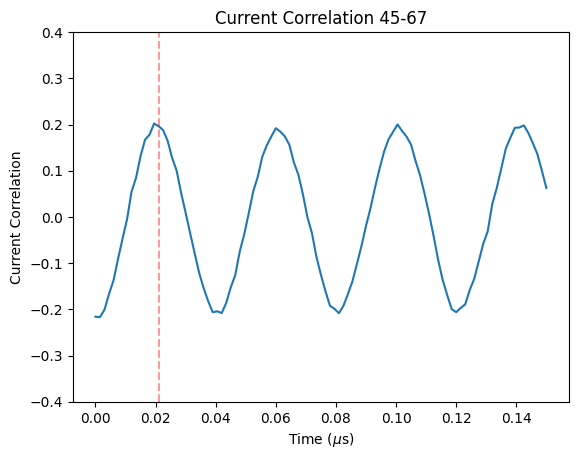

In [144]:
beamsplitter_time = 0.021

for p in range(len(correlation_pairs)):
    plt.plot(times, covariance_sums[p])
    plt.xlabel('Time ($\mu$s)')
    plt.ylabel('Current Correlation')

    plt.axvline(beamsplitter_time, color='r', alpha=0.4, linestyle='--', label='Beamsplitter Time')

    plt.ylim(-0.4, 0.4)

    readout_pair_1, readout_pair_2 = correlation_pairs[p]
    q1, q2 = readout_pair_1
    q3, q4 = readout_pair_2

    plt.title(f'Current Correlation {q1}{q2}-{q3}{q4}')
    plt.show()

In [ ]:
# compare to class

current_simulation = CurrentMeasurementSimulation(
    num_levels=num_levels,
    num_qubits=num_qubits,
    num_particles=num_particles,
    J=J,
    J_parallel=J_parallel,
    U=U,
    times=times,
    readout_pair_1=[2,3],
    readout_pair_2=[4,5],
    initial_detunings=initial_detunings,
    measurement_detuning=measurement_detuning,
    measurement_J=measurement_J,
    measurement_J_parallel=measurement_J_parallel,
    psi0=psi0,
    time_offset=time_offset,
    T1=T1,
    T2=T2,
    print_logs=True
)

current_simulation.run_simulation(True)


In [ ]:
current_simulation.plot_covariance_sum(ylim=(-0.4, 0.4))

In [ ]:
# reduced correlations

correlation_pairs = []

# d=2
correlation_pairs.append(((1,2),(3,4)))
correlation_pairs.append(((2,3),(4,5)))
correlation_pairs.append(((3,4),(5,6)))
correlation_pairs.append(((4,5),(6,7)))
correlation_pairs.append(((5,6),(7,8)))

# d=3
correlation_pairs.append(((1,2),(4,5)))
correlation_pairs.append(((2,3),(5,6)))
correlation_pairs.append(((3,4),(6,7)))
correlation_pairs.append(((4,5),(7,8)))

# d=4
correlation_pairs.append(((1,2),(5,6)))
correlation_pairs.append(((2,3),(6,7)))
correlation_pairs.append(((3,4),(7,8)))

# d=5
correlation_pairs.append(((1,2),(6,7)))
correlation_pairs.append(((2,3),(7,8)))

# d=6
correlation_pairs.append(((1,2),(7,8)))

In [34]:
correlation_pairs = []
correlation_pairs.append(((5,6),(7,8)))


In [35]:



J_list = [J]*(num_qubits-1)
J_parallel_list = [J_parallel]*(num_qubits-2)

psi0 = eigenstate
times = np.linspace(0, 0.15, 101)
e_ops = number_operators


a_1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels), qt.qeye(num_levels)])
a_2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels), qt.qeye(num_levels)])
a_3 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a, qt.qeye(num_levels)])
a_4 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), qt.qeye(num_levels), a])

annihilation_operators_reduced = [a_1, a_2, a_3, a_4]
number_operators_reduced = [a_i.dag()*a_i for a_i in annihilation_operators_reduced]
correlation_operators_reduced = []
for i in range(3):
    corr_op = annihilation_operators_reduced[i].dag() * annihilation_operators_reduced[i+1]
    correlation_operators_reduced.append(corr_op)

covariance_sums_reduced = []

for p in range(len(correlation_pairs)):
    

    H_BS_reduced = 0

    correlation_pair = correlation_pairs[p]

    measurement_detuning = correlation_pair_to_measurement_detunings[correlation_pair]


    readout_qubits_1, readout_qubits_2 = correlation_pair

    readout_pair_1 = [q - 1 for q in readout_qubits_1]
    readout_pair_2 = [q - 1 for q in readout_qubits_2]

    q1, q2 = readout_pair_1
    q3, q4 = readout_pair_2
    qubit_list = [q1, q2, q3, q4]

    for i in range(len(number_operators_reduced)):
        a_i = annihilation_operators_reduced[i]
        q_i = qubit_list[i]
        for j in range(i+1, len(number_operators_reduced)):
            q_j = qubit_list[j]
            a_j = annihilation_operators_reduced[j]
            coupling = 0
            if abs(q_i - q_j) == 1:
                coupling = J_list[min(q_i, q_j)]

            if abs(q_i - q_j) == 2:
                coupling = J_parallel_list[min(q_i, q_j)]

            H_BS_reduced += coupling*(a_i.dag()*a_j + a_j.dag()*a_i)

        H_BS_reduced += U/2 * a_i.dag()*a_i*(a_i.dag()*a_i - 1)

        H_BS_reduced += a_i.dag()*a_i*measurement_detuning[q_i]

    rho_0 = psi0.ptrace(qubit_list)

    result = qt.mesolve(H_BS_reduced, rho_0, times)

    populations = np.zeros((4, len(times)))

    for i in range(len(number_operators_reduced)):
        populations[i,:] = qt.expect(number_operators_reduced[i], result.states)

    covariances = np.zeros((len(number_operators_reduced), len(number_operators_reduced), len(times)))

    for i in range(len(number_operators_reduced)):
        for j in range(len(number_operators_reduced)):
            covariances[i,j,:] = qt.expect(number_operators_reduced[i] * number_operators_reduced[j], result.states)




    covariance_sum = 0

    covariance_sum += covariances[0,2,:] - populations[0, :] * populations[0, :]
    covariance_sum -= covariances[0,3,:] - populations[0, :] * populations[3, :]
    covariance_sum -= covariances[1,2,:] - populations[1, :] * populations[2, :]
    covariance_sum += covariances[1,3,:] - populations[1, :] * populations[3, :]


    covariance_sums_reduced.append(covariance_sum)

covariance_sums_reduced = np.array(covariance_sums_reduced)




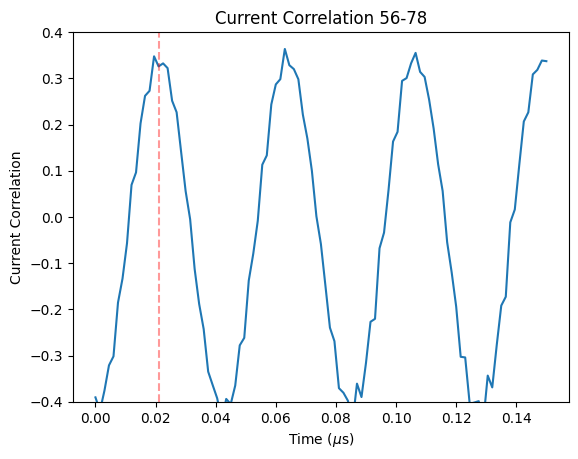

In [36]:
beamsplitter_time = 0.021


for p in range(len(correlation_pairs)):
    plt.plot(times, covariance_sums_reduced[p])
    plt.xlabel('Time ($\mu$s)')
    plt.ylabel('Current Correlation')

    plt.axvline(beamsplitter_time, color='r', alpha=0.4, linestyle='--', label='Beamsplitter Time')

    plt.ylim(-0.4, 0.4)

    readout_qubits_1, readout_qubits_2 = correlation_pairs[p]
    q1, q2 = readout_qubits_1
    q3, q4 = readout_qubits_2

    plt.title(f'Current Correlation {q1}{q2}-{q3}{q4}')
    plt.show()

In [21]:
beamsplitter_index = np.argmin(np.abs(times - beamsplitter_time))
print("Beamsplitter Index:", beamsplitter_index)

correlation_distance_to_value = {}

for i in range(len(correlation_pairs)):

    correlation_pair = correlation_pairs[i]
    readout_qubits_1, readout_qubits_2 = correlation_pair

    correlation_distance = readout_qubits_2[0] - readout_qubits_1[0]


    if not correlation_distance in correlation_distance_to_value:
        correlation_distance_to_value[correlation_distance] = []
        
    if correlation_distance in correlation_distance_to_value:
        correlation_distance_to_value[correlation_distance].append(covariance_sums_reduced[i,beamsplitter_index])
    
        

    


Beamsplitter Index: 14


In [22]:
print(correlation_distance_to_value)

{2: [0.3955354678875268, 0.3955354678875268, 0.19510147396560304, 0.15271894573223924, 0.21013218640144646, 0.3257907617312841], 3: [0.21644731871560424, 0.21644731871560424, 0.10312984762280447, 0.09272558284386626, 0.14310588050148615], 4: [0.10915468381373206, 0.10915468381373206, 0.08859217118077897, 0.0766749352055669], 5: [0.1032645159974942, 0.1032645159974942, 0.08836538138515204], 6: [0.10401164346400843, 0.10401164346400843]}


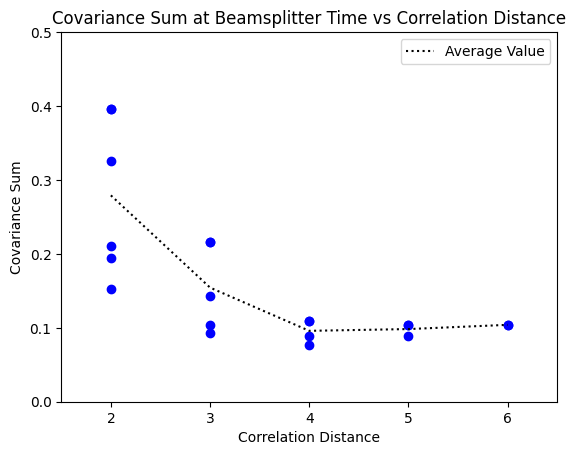

In [24]:
distances = []
average_values = []

for distance in correlation_distance_to_value:

    values = correlation_distance_to_value[distance]

    distances.append(distance)
    average_values.append(np.mean(values))

    plt.scatter(np.ones(len(values))*distance, values, color='b')


plt.plot(distances, average_values, linestyle=':', color='black', label='Average Value')



plt.ylim(0, 0.5)

plt.xticks(range(2, 7))
plt.xlim(1.5, 6.5)

plt.legend()    
plt.xlabel('Correlation Distance')
plt.ylabel('Covariance Sum')
plt.title('Covariance Sum at Beamsplitter Time vs Correlation Distance')
plt.show()

In [ ]:
rho_2 = current_simulation.psi0
H_BS_reduced_2 = current_simulation.measurement_Hamiltonian
times_2 = current_simulation.times




In [39]:

# result = qt.mesolve(H_BS_reduced, rho_0, times)
result = qt.mesolve(test_H, rho_0, times)

populations = np.zeros((4, len(result.times)))

for i in range(len(number_operators_reduced)):
    populations[i,:] = qt.expect(number_operators_reduced[i], result.states)

covariances = np.zeros((len(number_operators_reduced), len(number_operators_reduced), len(result.times)))

for i in range(len(number_operators_reduced)):
    for j in range(len(number_operators_reduced)):
        covariances[i,j,:] = qt.expect(number_operators_reduced[i] * number_operators_reduced[j], result.states)




covariance_sum = 0

covariance_sum += covariances[0,2,:] - populations[0, :] * populations[0, :]
covariance_sum -= covariances[0,3,:] - populations[0, :] * populations[3, :]
covariance_sum -= covariances[1,2,:] - populations[1, :] * populations[2, :]
covariance_sum += covariances[1,3,:] - populations[1, :] * populations[3, :]



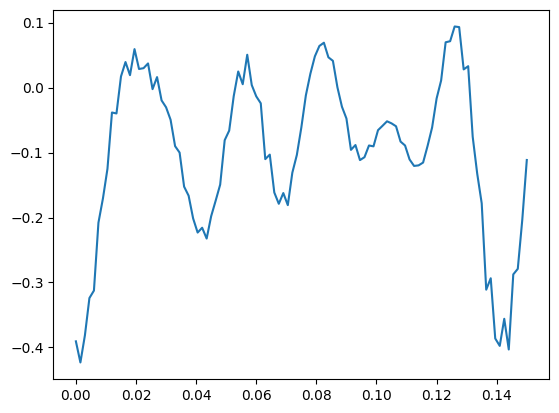

In [40]:
plt.plot(times, covariance_sum)

In [46]:
print(np.round(H_BS_reduced.full().real/2/np.pi))
print(test_H.full().real/2/np.pi)

b = H_BS_reduced - test_H

# print(b.full().real/2/np.pi)

# print(np.where(np.abs(b.full()) > 1e-10))

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.  300.    0. ...    0.    0.    0.]
 [   0.    0.  400. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -400.    0.    0.]
 [   0.    0.    0. ...    0. -100.    0.]
 [   0.    0.    0. ...    0.    0.   -0.]]
[[    0.     0.     0. ...     0.     0.     0.]
 [    0.   300.     0. ...     0.     0.     0.]
 [    0.     0.   200. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -1000.     0.     0.]
 [    0.     0.     0. ...     0.  -700.     0.]
 [    0.     0.     0. ...     0.     0.  -800.]]


In [ ]:
# print(H_BS_reduced.full().real/2/np.pi)
# print(H_BS_reduced_2.full().real/2/np.pi)

b = H_BS_reduced - H_BS_reduced_2

print(b.full().real/2/np.pi)

In [ ]:
# current_simulation.measurement_Hamiltonian = H_BS_reduced
# current_simulation.run_simulation(False)
# current_simulation.plot_populations()
# current_simulation.plot_covariance_sum()


In [ ]:
basis_4Q = list(product(range(num_levels), repeat=4))
print(basis_4Q)

measurement_Hamiltonian_array_1 = H_BS_reduced.full()
measurement_Hamiltonian_array_2 = H_BS_reduced_2.full()

for i in range(len(basis_4Q)):

    if np.any(np.array(basis_4Q[i]) > 1):
            continue

    for j in range(i, len(basis_4Q)):

        if i == j:
            continue

        if np.any(np.array(basis_4Q[j]) > 1):
            continue

        # if abs(measurement_Hamiltonian_array[i,j]) <= 1e-10:
            # continue

        if np.sum(basis_4Q[i]) != np.sum(basis_4Q[j]):
            continue


        # print(i == j)


        print(f'{basis_4Q[i]} {basis_4Q[j]} {measurement_Hamiltonian_array_1[i,j].real/2/np.pi} ---- {measurement_Hamiltonian_array_2[i,j].real/2/np.pi}')
